In [1]:
import xgcm
import xmitgcm
import xrft
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import ipyvolume
import ipyvolume.pylab as p3

In [3]:
from dask.utils import SerializableLock
from dask.distributed import Client
scheduler_file = '../.dask_scheduler/dask_scheduler_file-' + os.environ['SLURM_JOBID']
client = Client(scheduler_file=scheduler_file)
client

<Client: scheduler='tcp://10.43.4.184:8786' processes=1 cores=48>

In [4]:
ddir = '/rigel/ocp/users/ra2697/channel_topography/GCM/run_taux2000_rb0110_bump'
ds = xmitgcm.open_mdsdataset(ddir, prefix=['U', 'Eta', 'T', 'V', 'S', 'W'], iters=[8294400])
ds

/rigel/home/ra2697/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1)
Coordinates:
    iter                 (time) int64 8294400
  * time                 (time) int64 8294400
  * YG                   (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * XC                   (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * XG                   (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * YC                   (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
  * Z                    (Z) float32 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 ...
  * Zu                   (Zu) float32 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    dxC                  (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    dyC 

In [5]:
grid = xgcm.Grid(ds)
grid

<xgcm.Grid>
X-axis:     XC: 400 (cell center), XG: 400 (cell face, shift -1) periodic
Y-axis:     YC: 400 (cell center), YG: 400 (cell face, shift -1) periodic

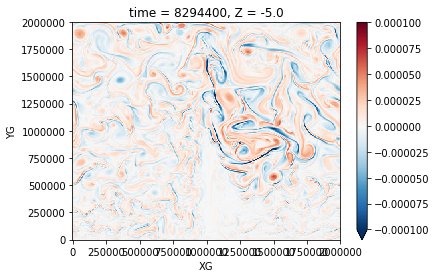

In [6]:
vort3 = (-grid.diff(ds.U*ds.dxC, 'Y') + grid.diff(ds.V*ds.dyC, 'X'))/ds.rAz
vort3[0,0].plot(vmax=1e-4)

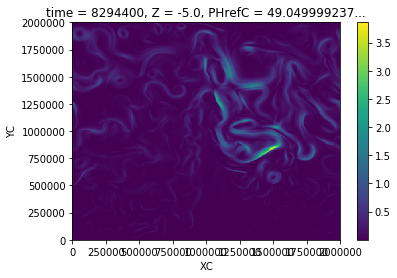

In [9]:
ke = grid.interp((ds.U*ds.hFacW)**2, 'X') + grid.interp((ds.V*ds.hFacS)**2, 'Y').where(ds.hFacC>0)
ke[0,0].plot()

In [23]:
ipyvolume.pylab.volshow(ke[0,::-1].values, lighting=True,
                  level=[0.62, 0.28, 0.14],
                  opacity=[0.5, 0.2, 0.05],
                  data_min=0, data_max=1)

/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/ipyvolume/serialize.py:21: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


reset view
